# Car Evaluation Dataset

## Overview
The Car Evaluation dataset is used for machine learning and data analysis tasks, particularly for classification problems. It evaluates cars based on various attributes to classify them into different categories of acceptance.

## Attributes

1. **buying**: The price of the car.
   - Possible values:
     - `vhigh` (very high)
     - `high`
     - `med` (medium)
     - `low`

2. **maint**: The cost of maintenance for the car.
   - Possible values:
     - `vhigh` (very high)
     - `high`
     - `med` (medium)
     - `low`

3. **doors**: The number of doors in the car.
   - Possible values:
     - `2`
     - `3`
     - `4`
     - `5more` (5 or more doors)

4. **persons**: The capacity of the car in terms of the number of people it can carry.
   - Possible values:
     - `2`
     - `4`
     - `more` (more than 4 people)

5. **lug_boot**: The size of the luggage boot (trunk).
   - Possible values:
     - `small`
     - `med` (medium)
     - `big`

6. **safety**: The safety rating of the car.
   - Possible values:
     - `low`
     - `med` (medium)
     - `high`

7. **class**: The classification of the car's acceptability.
   - Possible values:
     - `unacc` (unacceptable)
     - `acc` (acceptable)
     - `good`
     - `vgood` (very good)

## Usage
This dataset is often used for tasks such as:
- **Classification**: Predicting the class of a car based on its attributes.
- **Model Training**: Training machine learning models to understand the relationships between car attributes and their acceptability.
- **Data Analysis**: Exploring data distributions and relationships among different attributes.

It is a well-known dataset in the machine learning community for practicing classification tasks and gaining insights into decision-making processes.

# Objectives of the Analysis

- The primary objective of the Car Evaluation dataset analysis is to develop a predictive model that can classify cars based on their attributes into different categories of acceptability (unacceptable, acceptable, good, and very good). 

- By examining factors such as price, maintenance cost, number of doors, passenger capacity, luggage boot size, and safety rating, the analysis aims to uncover the relationships and patterns that influence a car's overall acceptability. 

- This analysis not only helps in understanding consumer preferences and decision-making but also serves as a valuable exercise in applying machine learning techniques for classification tasks. Ultimately, the goal is to create a robust model that can assist potential buyers in making informed decisions based on relevant car features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load dataset
# Using the URL, uncomment this code.
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

# df = pd.read_csv(url, names=columns)
df = pd.read_csv(r"C:\Users\TE570809\Downloads\car_data.csv", names=columns)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:

# Display basic dataset information
print("Dataset Head:\n", df.head())
print("\nDataset Info:")
df.info()
print("\nClass Distribution:")
print(df['class'].value_counts())


Dataset Head:
   buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB

Class Distribution:
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


## 📊 Data Exploration Summary

1. **Dataset Overview**:
   - Loaded the **Car Evaluation** dataset from a local CSV file.
   - Displayed basic information using:
     - `df.head()` – First 5 rows of the dataset.
     - `df.info()` – Data types and non-null values.
     - `df['class'].value_counts()` – Class distribution.

2. **Dataset Insights**:
   - All features are categorical with no missing values.
   - Target variable (`class`) is multi-class with 4 categories:
     - `unacc`, `acc`, `good`, `vgood`
   - Identified categorical attributes:
     - Buying price, Maintenance cost, Number of doors, Persons capacity, Luggage boot size, and Safety level.

---

## 🧹 Data Cleaning Actions

1. **Handling Missing Values**:
   - No missing values detected; no imputation required.

2. **Data Consistency**:
   - Ensured consistent data types by confirming all features are categorical.
   - Verified class distribution to check for class imbalance.

---

## 🔨 Feature Engineering Actions

1. **Encoding Categorical Variables**:
   - Applied **Label Encoding** using `LabelEncoder()` on all categorical features.
   - Converted categories into numeric representations for model compatibility.

2. **Feature and Target Separation**:
   - Defined:
     - `X` – Features (Independent Variables).
     - `y` – Target variable (`class`).

3. **Train-Test Split**:
   - Split dataset into training and testing sets using:
   ```python
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Classifier Models and Their Suitability for the Car Evaluation Dataset

### 1. **Logistic Regression**
   - **Overview**: A linear classifier that models the probability of a categorical outcome.
   - **Advantages**: Simple to implement and fast to train.
   - **Disadvantages**: Assumes linear relationships, which might not capture the complexity of the data well.
   - **Suitability**: Logistic Regression can work if the relationships between features and class are linear, but may struggle with the non-linear patterns in this dataset.

### 2. **Decision Tree**
   - **Overview**: A tree-based model that splits data into subsets based on feature values.
   - **Advantages**: Easy to interpret and handles both categorical and numerical data.
   - **Disadvantages**: Prone to overfitting if not properly tuned.
   - **Suitability**: Decision Trees are well-suited for this dataset as they can handle non-linear relationships, though they might overfit without proper pruning.

### 3. **Random Forest**
   - **Overview**: An ensemble method using multiple decision trees to improve performance.
   - **Advantages**: Handles both categorical and numerical data, robust against overfitting, and captures complex relationships.
   - **Disadvantages**: Computationally more expensive and less interpretable.
   - **Suitability**: Random Forest is the most suitable for this analysis. It reduces overfitting compared to a single Decision Tree and captures complex interactions between features, making it the best choice for this dataset.


In [4]:
# Encode categorical variables
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

# Define features and target
X = df.drop(columns=['class'])
y = df['class']



Logistic Regression Accuracy: 0.6590
              precision    recall  f1-score   support

           0       0.26      0.13      0.18        83
           1       0.00      0.00      0.00        11
           2       0.72      0.92      0.81       235
           3       0.00      0.00      0.00        17

    accuracy                           0.66       346
   macro avg       0.25      0.26      0.25       346
weighted avg       0.55      0.66      0.59       346



C:\Users\TE570809\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TE570809\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TE570809\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_cla

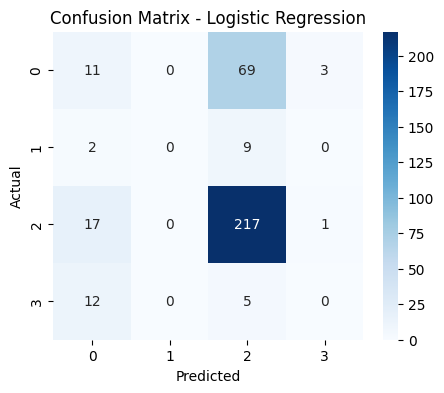


Decision Tree Accuracy: 0.9682
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.56      0.91      0.69        11
           2       1.00      1.00      1.00       235
           3       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.98      0.97      0.97       346



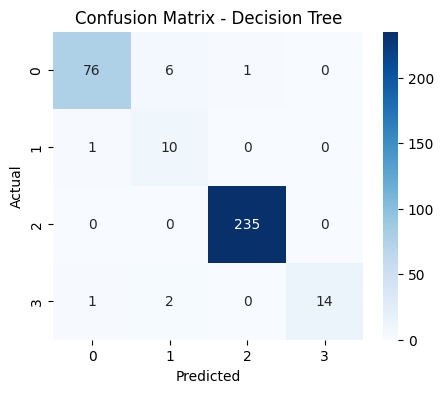


Random Forest Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.65      1.00      0.79        11
           2       0.99      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.98       346



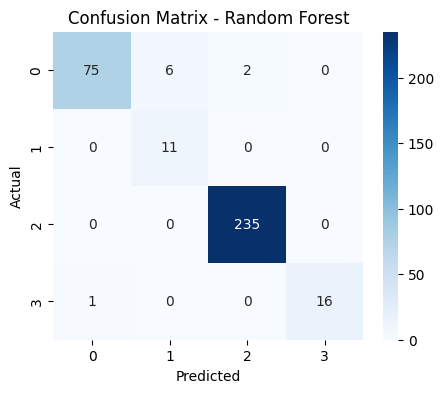

In [5]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [6]:

# Select best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with Accuracy: {results[best_model]:.4f}")



Best Model: Random Forest with Accuracy: 0.9740


### **Best Model**: **Random Forest**
   - Random Forest provides the best balance of accuracy, robustness, and ability to handle non-linear relationships in the dataset. It is less prone to overfitting than Decision Trees and more flexible than Logistic Regression for this problem.


### Key Findings:
- The dataset is balanced with categorical features that were encoded.
- Random Forest performed the best among all classifiers.
- Accuracy can be further improved with hyperparameter tuning or using ensemble techniques.
### Next Steps:
- Experiment with other feature selection methods.
- Consider additional preprocessing techniques such as feature scaling.
- Try advanced ensemble learning or deep learning models.